In [3]:
import urllib
from bs4  import BeautifulSoup
import pandas as pd

In [2]:
products=['laptops','mobiles','fridge','smart tv','samsung','mi','realme','lava','hp','washing machines','watch','monitor','samsung monitor','sony led','blue star air conditioner','tablet','lg washing machine','honor mobiles','huawei mobiles']

In [37]:
df=pd.DataFrame(columns=['Product_name','Review','Rating'])
for product in products:
    
    product=product.lower()
    basic='https://www.flipkart.com'
    lst=product.split(' ')
    product='+'.join(lst)
    req=urllib.request.urlopen(f'{basic}'+'/search?q='+f'{product}')
    soup=BeautifulSoup(req,'html.parser') # produced searched and displayed
    
    j=soup.find_all('a',attrs={'class':'_1fQZEK'},href=True)
    for i in j:
        req_prod=urllib.request.urlopen(f'{basic}{i["href"]}')  # entering into the link of particular product
        soup_prod=BeautifulSoup(req_prod,'html.parser')

        name_soup=soup_prod.find('span',attrs={'class':'B_NuCI'})
        name=name_soup.text   # name of the product

        
        comments_rating_divs=soup_prod.find_all('div',attrs={'class':'col _2wzgFH'})
        
        for comment_rating_div in comments_rating_divs:
            
            c=comment_rating_div.find_all('div',attrs={'class':'row'})
            rating=c[0].div.text   # rating of product
            comment=c[1].div.div.div.text  # review of the product
            df=df.append({'Product_name':name,'Review':comment,'Rating':rating},ignore_index=True)
                    

In [40]:
df

,Product_name,Review,Rating
0,SONY BRAVIA 80 cm (32 inch) HD Ready LED Smart...,"Sony is really a great brand, and I really lik...",5
1,SONY BRAVIA 80 cm (32 inch) HD Ready LED Smart...,Best from sony (32 inch) tv. I have taken righ...,5
2,SONY BRAVIA 80 cm (32 inch) HD Ready LED Smart...,"I compare all other TV it's take me 2 month , ...",5
3,SONY BRAVIA 80 cm (32 inch) HD Ready LED Smart...,Very good,4
4,SONY BRAVIA 80 cm (32 inch) HD Ready LED Smart...,Awesome picture and sound quality.... ❤️❤️... ...,5
...,...,...,...
1243,Honor 8 (4 GB RAM),"This is truly a masterpiece , awesome design a...",4
1244,Honor 8 (4 GB RAM),It's been about 10 days since the purchase and...,5
1245,Honor 8 (4 GB RAM),amazing ...simply amazing in the feel..too goo...,5
1246,Honor 8 (4 GB RAM),LTPS display is very share and smooth feel.Fin...,5


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 0 to 1247
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product_name  1248 non-null   object
 1   Review        1248 non-null   object
 2   Rating        1248 non-null   object
dtypes: object(3)
memory usage: 29.4+ KB


In [42]:
import seaborn as sns

In [43]:
df_new_new=df.copy()

In [68]:
def change(old_data):
    for i in range(0,len(old_data)):
        if((old_data['Rating'][i]=='2') |  (old_data['Rating'][i]=='1')):
            old_data['Rating'][i]='Negative'
        else:
            old_data['Rating'][i]='Postive'
    return old_data

C:\ProgramData\Anaconda3\envs\genuine1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='count'>

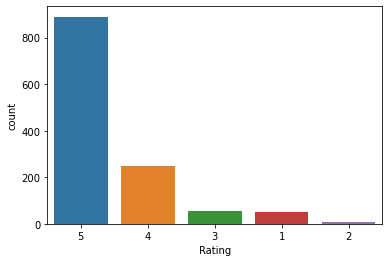

In [45]:
import seaborn as sns
sns.countplot(df_new['Rating'])

In [102]:
df_new_new

,Product_name,Review,Rating
0,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
1,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5
2,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Amazing laptop, am so much happy, thanks for F...",5
3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,Over all a good laptop for personal use,5
4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,Thank you so much Flipkart,4
...,...,...,...
2429,"Huawei Y9 (Sapphire Blue, 64 GB) (4 GB RAM)",product quality is too bad.some of the functio...,1
2430,"Huawei Y9 (Sapphire Blue, 64 GB) (4 GB RAM)",It's like nothing,1
2431,"Huawei Honor 8 (Sakura Pink, 32 GB) (4 GB RAM)",just drop into the water for few second and mo...,1
2432,"Huawei Ascend P6 (White, 8 GB) (2 GB RAM)",Huawei is a good manufacturer I have used 1 of...,2


In [104]:
df_new_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2434 entries, 0 to 2433
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product_name  2434 non-null   object
 1   Review        2434 non-null   object
 2   Rating        2434 non-null   object
dtypes: object(3)
memory usage: 57.2+ KB


C:\ProgramData\Anaconda3\envs\genuine1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='count'>

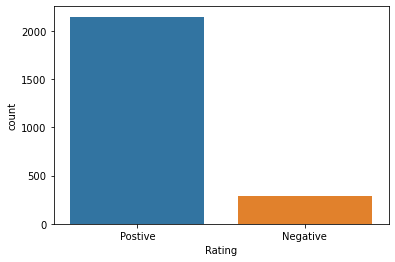

In [107]:
sns.countplot(df_new_new['Rating'])

In [106]:
df_new_new=change(df_new_new)

In [109]:
df_new_new.to_csv('df_new_new.csv',index=False)